# Getting the data

In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-01-24 16:10:48--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.112, 172.253.63.128, 142.250.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   214MB/s    in 0.3s    

2021-01-24 16:10:49 (214 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Model

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [5]:
model = keras.models.Sequential([
            keras.layers.Conv2D(16, (3,3), activation='relu', input_shape = (150,150,3)),
            keras.layers.MaxPooling2D(2,2),
            keras.layers.Conv2D(32,(3,3),activation=keras.activations.relu),
            keras.layers.MaxPooling2D(2,2),
            keras.layers.Conv2D(64,(3,3),activation='relu'),
            keras.layers.MaxPooling2D(2,2),
            keras.layers.Flatten(),
            keras.layers.Dense(512,activation='relu'),
            keras.layers.Dense(1,activation='sigmoid')         
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [7]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
from keras_preprocessing.image import ImageDataGenerator

# Image Augmentation
train_datagen = ImageDataGenerator(
            rescale = 1./255,
            rotation_range = 40,
            width_shift_range = 0.2,
            height_shift_range = 0.2,
            shear_range = 0.2,
            zoom_range = 0.2,
            horizontal_flip = True,
            fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=50, steps_per_epoch=100, validation_steps=50, verbose=1)

Epoch 1/50
100/100 [==============================] - 24s 166ms/step - loss: 0.8249 - accuracy: 0.4990 - val_loss: 0.6914 - val_accuracy: 0.5250
Epoch 2/50
100/100 [==============================] - 16s 164ms/step - loss: 0.6925 - accuracy: 0.5280 - val_loss: 0.6899 - val_accuracy: 0.5400
Epoch 3/50
100/100 [==============================] - 16s 162ms/step - loss: 0.6889 - accuracy: 0.5472 - val_loss: 0.6872 - val_accuracy: 0.5710
Epoch 4/50
100/100 [==============================] - 16s 164ms/step - loss: 0.6786 - accuracy: 0.5752 - val_loss: 0.6763 - val_accuracy: 0.5750
Epoch 5/50
100/100 [==============================] - 16s 165ms/step - loss: 0.6634 - accuracy: 0.6088 - val_loss: 0.6402 - val_accuracy: 0.6420
Epoch 6/50
100/100 [==============================] - 17s 166ms/step - loss: 0.6579 - accuracy: 0.6085 - val_loss: 0.6109 - val_accuracy: 0.6640
Epoch 7/50
100/100 [==============================] - 16s 164ms/step - loss: 0.6331 - accuracy: 0.6357 - val_loss: 0.5988 - val_ac

Text(0.5, 1.0, 'Training and validation loss')

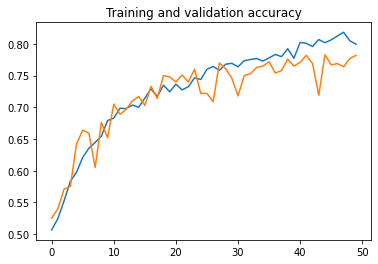

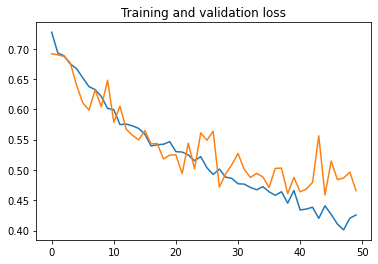

In [10]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plotting the training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title("Training and validation accuracy")
plt.figure()

#Plotting the traning and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')